# Exercise on Numpy and Matplotlib

In [41]:
import matplotlib.pyplot as plt
import numpy as np

In [42]:
data = np.loadtxt("http://scipy-lectures.org/_downloads/populations.txt")
name = ['hare', 'lynx', 'carrot']

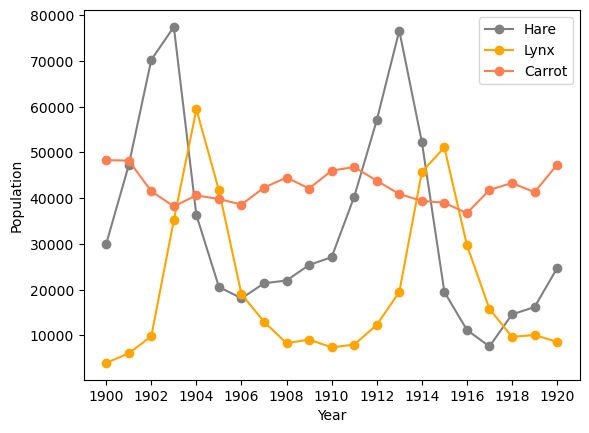

In [43]:
#1. Plot the populations for the years in the period. Add legend and axis labels to the plot.
plt.plot(data[:,0], data[:,1], '-o', c = 'grey', label='Hare')
plt.plot(data[:,0], data[:,2], '-o', c = 'orange', label='Lynx')
plt.plot(data[:,0], data[:,3], '-o', c = 'coral', label='Carrot')
plt.xlabel('Year')
plt.xticks(data[:,0][::2])
plt.ylabel('Population')
plt.legend()

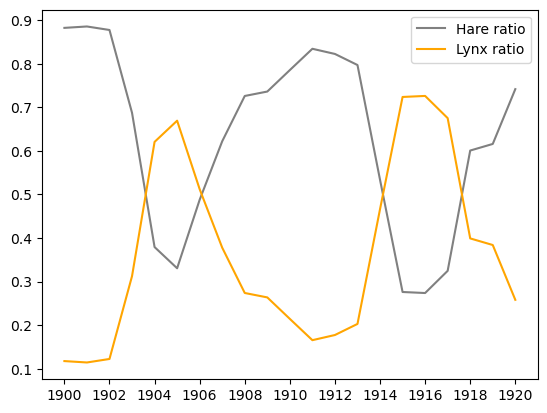

In [44]:
#2. Assuming total population of hares and lynxes is 100%, plot stacked bar graph showing ratio of each specis for the years in the period.
plt.plot(data[:,0], data[:,1] / (data[:,1] + data[:,2]), c = 'grey', label='Hare ratio')
plt.plot(data[:,0], data[:,2] / (data[:,1] + data[:,2]), c = 'orange', label='Lynx ratio')
plt.xticks(data[:,0][::2])
plt.legend()

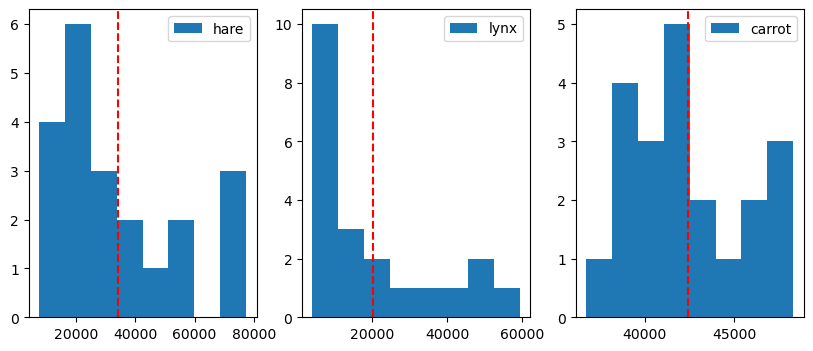

In [46]:
#3. Find the mean and std of the populations of each species. Plot the historgam of population for each species and show mean values with vertical line. Arrange 3 subplots in a row.
fix, fr = plt.subplots(1, 3, figsize=(10,4))
for i in range(3):
    fr[i].hist(data[:,i + 1], bins=8, label=name[i])
    fr[i].axvline(data[:,i + 1].mean(), c = 'r', linestyle='dashed', linewidth=1.5)
    fr[i].legend()

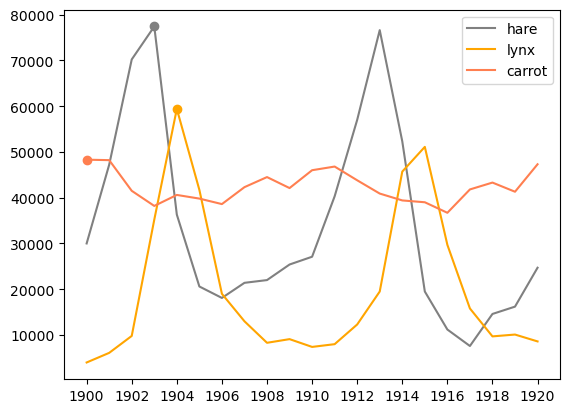

In [48]:
#4. Find which year each species had the largest population. Mark these years in the plot of populations.
from matplotlib import rcParams
max_idx = np.argmax(data[:,1:], axis=0)
c_1 = 'grey'
c_2 = 'orange'
c_3 = 'coral'
for i in range(3):
    
    if (i == 0):
        c_i = c_1
    if (i == 1):
        c_i = c_2
    if (i == 2):
        c_i = c_3
    plt.scatter(data[max_idx[i],0], data[max_idx[i], i + 1], c = c_i, marker = '.', s=rcParams['lines.markersize'] ** 2 * 4)
    plt.plot(data[:,0], data[:,i + 1], '-', c = c_i, label=name[i])
plt.xticks(data[:,0][::2])
plt.legend()

([<matplotlib.patches.Wedge at 0x1c8f9320490>,
 [Text(-0.6858388280562522, 0.8600145940217683, 'Hare'),
  Text(0.6858389085766268, -0.8600145298088989, 'Lynx')],
 [Text(-0.37409390621250116, 0.469098869466419, '71.43%'),
  Text(0.37409395013270547, -0.4690988344412175, '28.57%')])

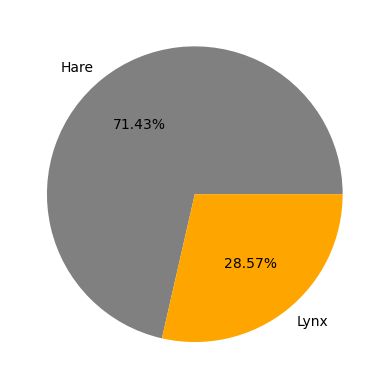

In [36]:
#5. Find which species (hares or lynxes) has the largest population for each year. Print the result as [H, H, L, H, ...]. 
#Plot a pie chart showing ratio of "H" and "L" values obtained.
name = ['Hare', 'Lynx']
max_pie = (data[:,1:3] == data[:,1:3].max(axis=1).reshape(-1, 1)).sum(0)
plt.pie(max_pie, labels=name[:2],colors=['grey', 'orange'], autopct='%1.2f%%')

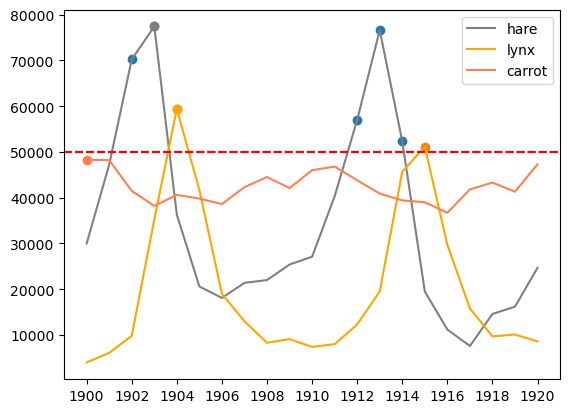

In [53]:
#6. Find which years any of the populations is above 50000.
#Show time periods where populations are above 50000 in the plot of populations.
more_50 = data[:,1:] > 50000
c_1 = 'grey'
c_2 = 'orange'
c_3 = 'coral'
for i in range(3):
    plt.scatter(data[more_50[:,i],0], data[more_50[:,i],i + 1])
    if (i == 0):
        c_i = c_1
    if (i == 1):
        c_i = c_2
    if (i == 2):
        c_i = c_3
    plt.plot(data[:,0], data[:,i + 1], '-', c = c_i, label=name[i])
    plt.axhline(50000, color='red', linestyle='dashed', linewidth=1.5)
plt.xticks(data[:,0][::2])
plt.legend()

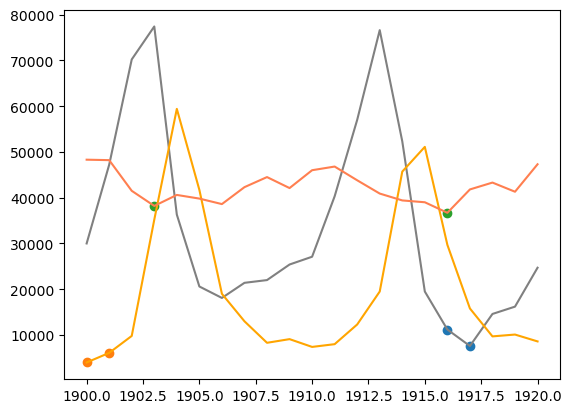

In [57]:
#7. Find the top 2 years for each species when they had the lowest populations.
top2min = data[:,1:] <= (np.partition(data[:,1:], 2, axis=0)[2 - 1]).reshape([1,3])
c_1 = 'grey'
c_2 = 'orange'
c_3 = 'coral'
for i in range(3):
    if (i == 0):
        c_i = c_1
    if (i == 1):
        c_i = c_2
    if (i == 2):
        c_i = c_3
    plt.plot(data[:,0], data[:,i + 1], '-', c = c_i, label=name[i])
    plt.scatter(data[top2min[:,i],0], data[top2min[:,i],i + 1])

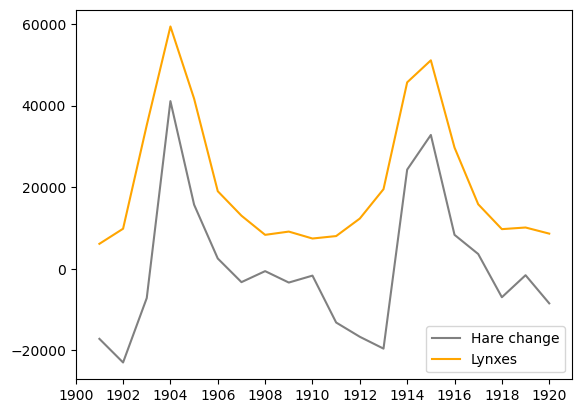

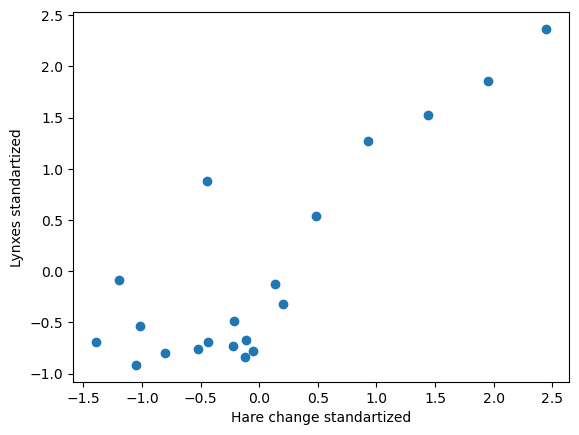

array([[1.        , 0.84948016],
       [0.84948016, 1.        ]])

In [60]:
#8. Plot the change in hare population and the number of lynxes. Find the correlation coefficient.
from scipy.ndimage import shift
hare_change = shift(data[:,1], 1)[1:] - data[1:,1]
plt.plot(data[1:,0], hare_change, '-', c = 'grey', label='Hare change')
plt.plot(data[1:,0], data[1:,2], c = 'orange', label='Lynxes')
plt.legend()
plt.xticks(data[:,0][::2])
plt.show()
plt.scatter((hare_change - hare_change.mean()) / hare_change.std(), (data[1:,2] - data[1:,2].mean()) /  data[1:,2].std())
plt.xlabel('Hare change standartized')
plt.ylabel('Lynxes standartized')
plt.show()
np.corrcoef(hare_change, data[1:,2])

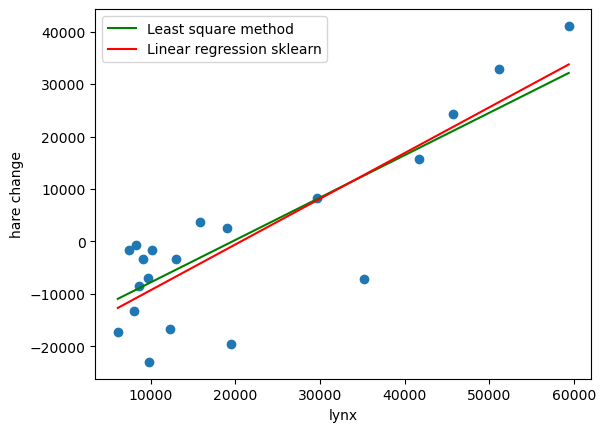

Difference = ~ -444


In [62]:
#10. Assume the population of hares in 1920 is unknown. Suggest a way to estimate this value.
#Compare an estimated value with the true value and print a ratio of the error to the true value.
lynx = data[1:,2]
hare = hare_change
n = len(data)
a = (n * (lynx * hare).sum() - lynx.sum() * hare.sum()) / (n * (lynx ** 2).sum() - (lynx.sum()) ** 2)
b = (hare.sum() - a * lynx.sum()) / n
plt.scatter(lynx, hare)
x = np.array([lynx.min(), lynx.max()])
y = a * x + b
plt.plot(x, y, '-', c = 'g', label='Least square method')
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(lynx.reshape(-1, 1), hare.reshape(-1, 1))
plt.plot(x, linear.predict(x.reshape(-1, 1)).reshape(-1), c = 'r', label='Linear regression sklearn')
plt.legend()
plt.xlabel('lynx')
plt.ylabel('hare change')
plt.show()

hare_change_1920_mnk = a * lynx[-1] + b
print("Difference = ~ %.f" % (hare_change_1920_mnk - hare[-1]))

# Second part

In [67]:

from sklearn.datasets import fetch_openml

mnist_data = fetch_openml('mnist_784',parser='auto')

In [70]:
from PIL import Image
import requests
from io import BytesIO
from sklearn.decomposition import PCA

url = 'https://mymodernmet.com/wp/wp-content/uploads/2017/08/monovision-awards-bw-series-of-the-year-2017-02.jpg'

[82.53738662 88.33075095 91.46837486 93.44023465 94.81298337 95.83033339
 96.61619801 97.25027333 97.78100225 98.23035299 98.60380505 98.91978316
 99.1864636  99.40346998 99.57992503]


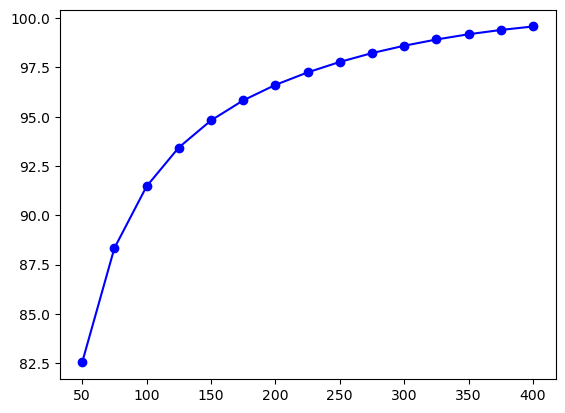

In [71]:
var_list = []
comp_range = np.arange(50, 401, 25)
for i in comp_range:
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(mnist_data.data.astype(float)) 
    var_list.append(pca.explained_variance_ratio_.sum())
var_list = np.asarray(var_list) * 100
print(var_list)
plt.plot(comp_range, var_list, '-o', c = 'b')
plt.show()

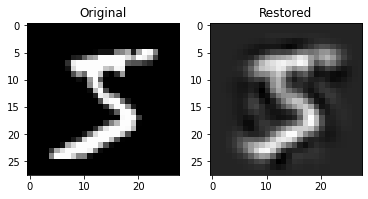

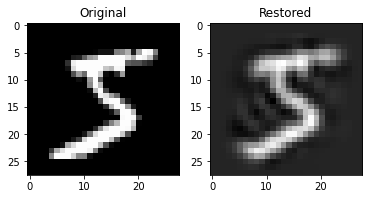

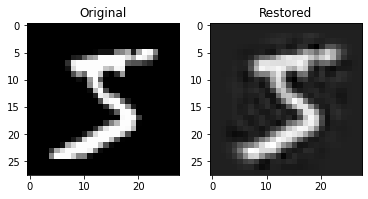

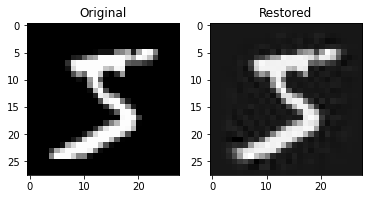

[0.8507970354597424, 0.9002224083181811, 0.949979997459405, 0.990634200588319]

In [46]:
comp_act = [59, 87, 154, 338]
comp_var_list = []
mnist_digits = mnist_data.data.astype(float)
for i in comp_act:
    pca = PCA(n_components=i)
    X_transformed = pca.fit_transform(mnist_digits)
    X_restored = pca.inverse_transform(X_transformed[0])
    comp_var_list.append(pca.explained_variance_ratio_.sum())
    fix, fr = plt.subplots(1, 2)
    fr[0].imshow(mnist_digits[0].reshape(28, 28), cmap = 'gray')
    fr[1].imshow(X_restored.reshape(28, 28), cmap = 'gray')
    fr[0].set_title('Original')
    fr[1].set_title('Restored')
    plt.show()
comp_var_list